In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings ('ignore')

In [ ]:
#correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

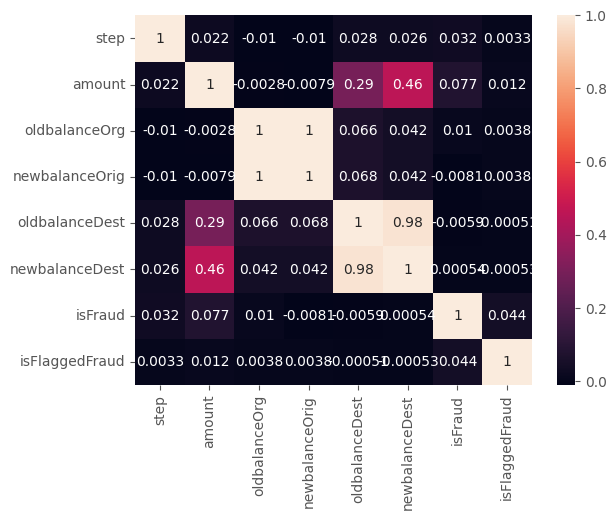

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='step', ylabel='Count'>

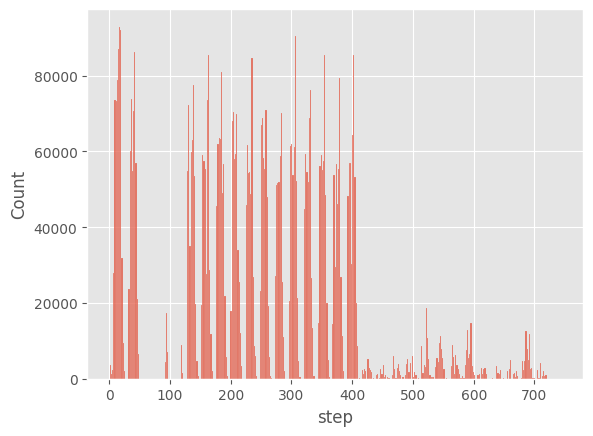

In [ ]:
#univariate Analysis
#step
sns.histplot(data=df,x="step")

<Axes: xlabel='step'>

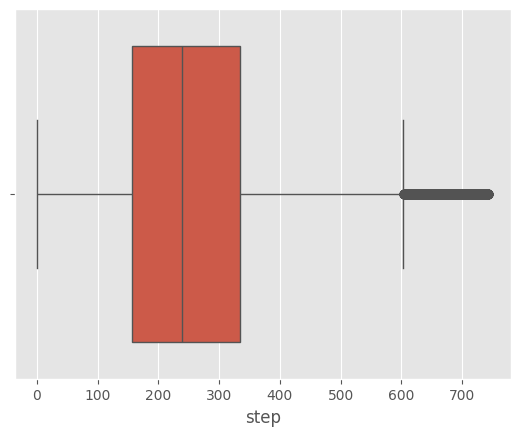

In [ ]:
sns.boxplot(data=df,x="step")

<Axes: xlabel='type', ylabel='count'>

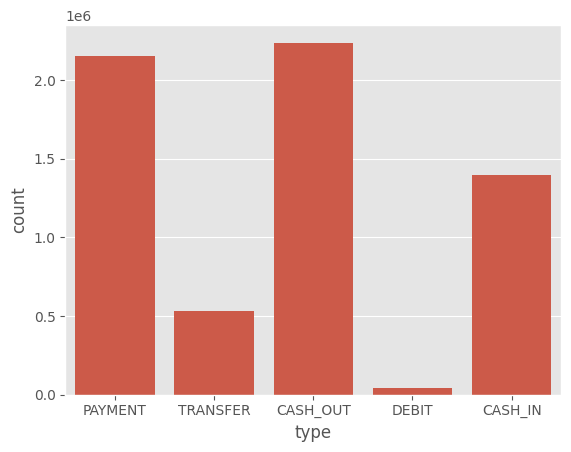

In [ ]:
#type
sns.countplot(data=df,x="type")

<Axes: xlabel='amount', ylabel='Count'>

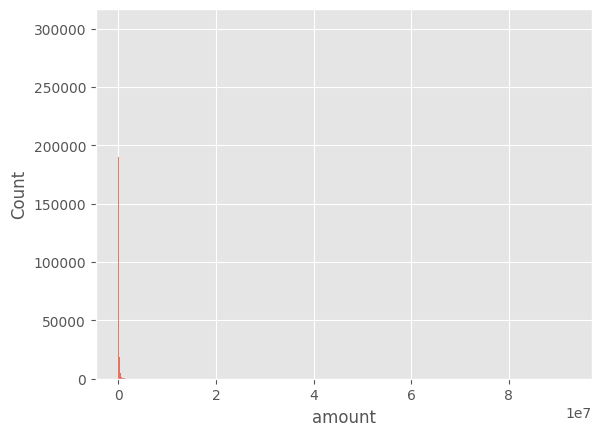

In [ ]:
#amount
sns.histplot(data=df,x="amount")

<Axes: xlabel='amount'>

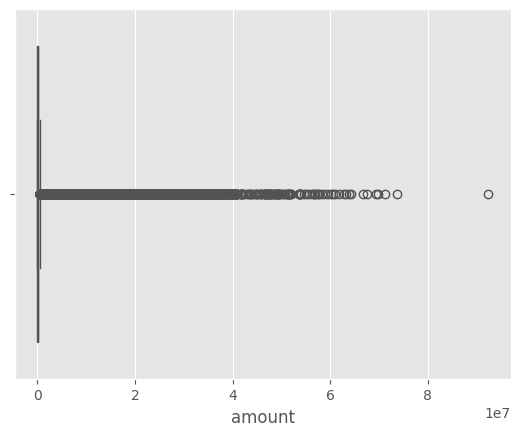

In [ ]:
#amount
sns.boxplot(data=df,x="amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

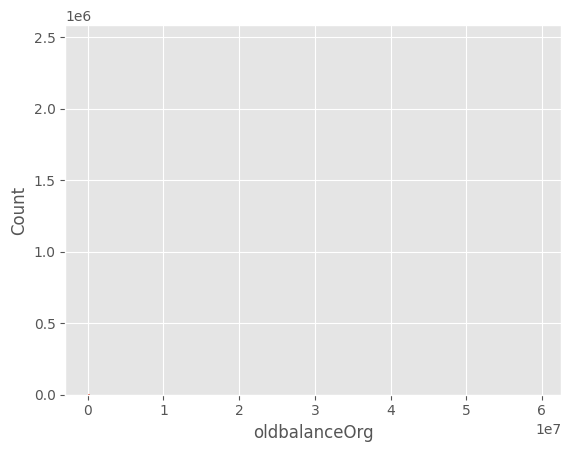

In [ ]:
#oldbalanceOrg
sns.histplot(data=df,x="oldbalanceOrg")

In [ ]:
df["nameDest"].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [ ]:
df = df.dropna(how='any')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df["nameDest"].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceOrg'>

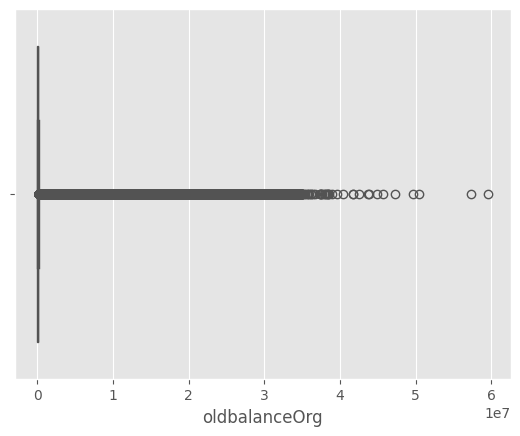

In [ ]:
#oldbalanceOrg
sns.boxplot(data=df,x="oldbalanceOrg")

<Axes: xlabel='newbalanceDest'>

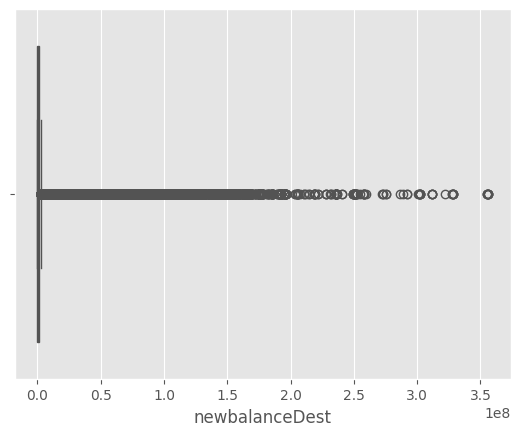

In [ ]:
#newbalanceDest
sns.boxplot(data=df,x="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

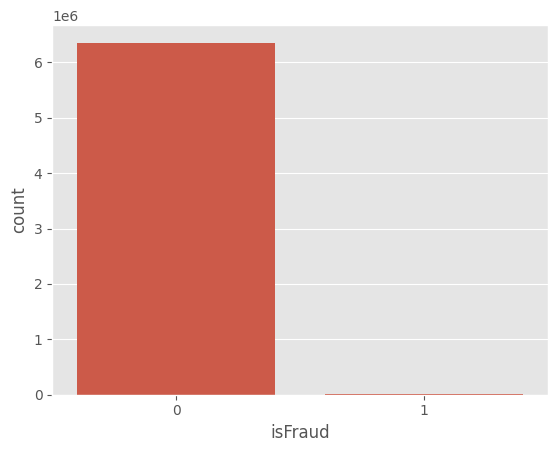

In [ ]:
#isFraud
sns.countplot(data=df,x="isFraud")

In [ ]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df.loc[df["isFraud"]==0,"isFraud"] = "is not Fraud"
df.loc[df["isFraud"]==1,"isFraud"] = "is Fraud"

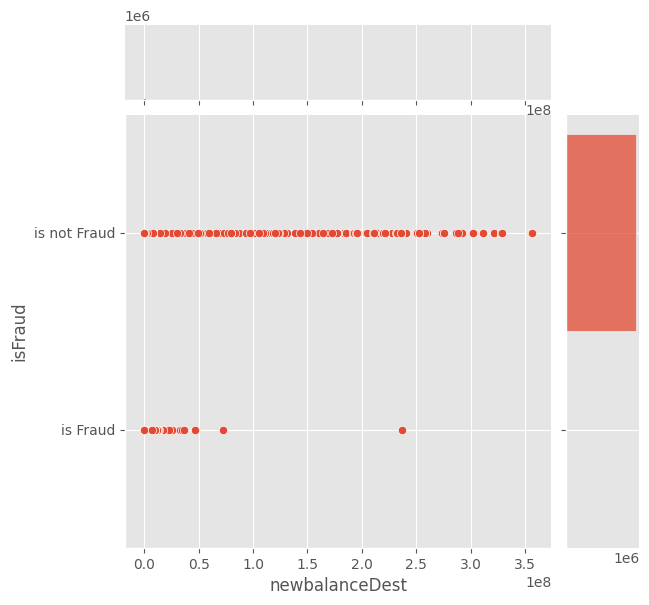

In [ ]:
#bivariate Analysis
sns.jointplot(data=df,x="newbalanceDest",y="isFraud")

<Axes: xlabel='type', ylabel='count'>

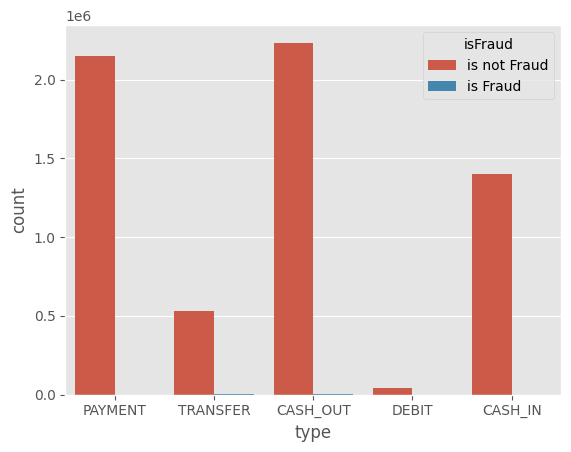

In [ ]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

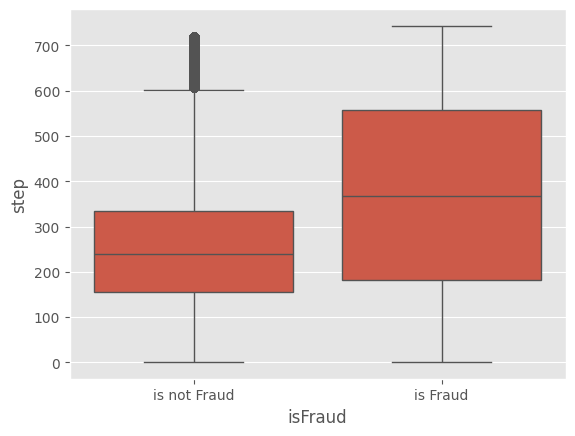

In [ ]:
sns.boxplot(data=df,x="isFraud",y="step")

<Axes: xlabel='isFraud', ylabel='amount'>

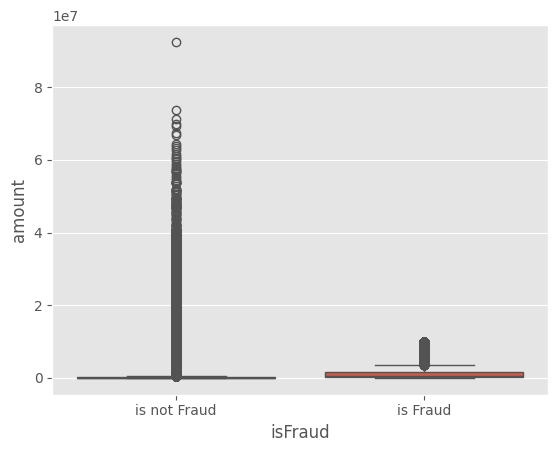

In [ ]:
sns.boxplot(data=df,x="isFraud",y="amount")

In [ ]:
sns.boxplot(data=df,x="isFraud",y="oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

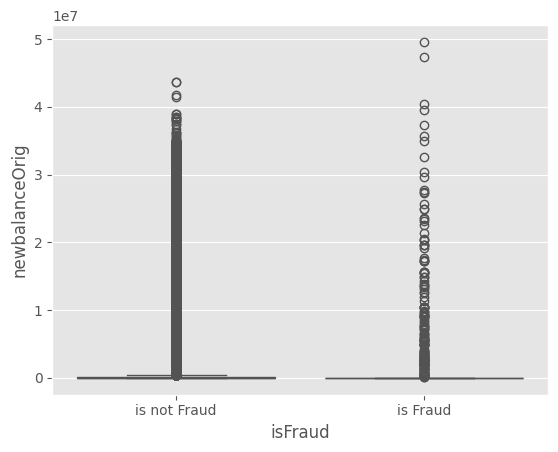

In [ ]:
sns.boxplot(data=df,x="isFraud",y="newbalanceOrig")

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

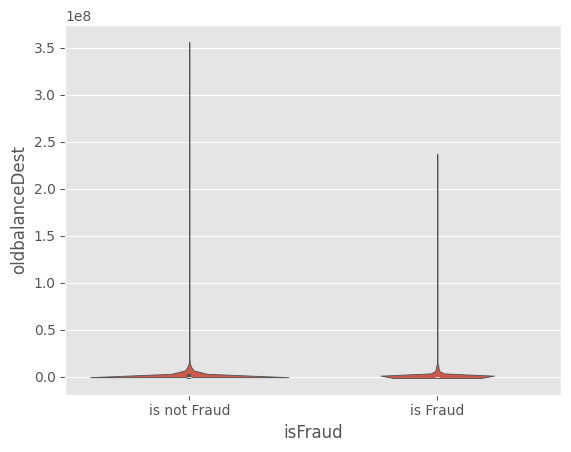

In [ ]:
sns.violinplot(data=df,x="isFraud",y="oldbalanceDest")

In [ ]:
sns.violinplot(data=df,x="isFraud",y="newbalanceDest")

In [ ]:
#Discriptive Analysis
df.describe(include="all")

In [ ]:
#shape of csv data
df.shape

In [ ]:
df.drop(["nameOrig","nameDest"], axis=1, inplace=True)
df.columns

In [ ]:
df.head()

In [ ]:
#Finding null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         object 
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 436.9+ MB


In [ ]:
sns.boxplot(df["amount"])

In [ ]:
from scipy import stats
print(stats.mode(df["amount"]))
print(np.mean(df["amount"]))

In [ ]:
q1 = np.quantile(df["amount"],0.25)
q3 = np.quantile(df["amount"],0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print("q1: ",q1)
print("q3: ",q3)
print("IQR: ",IQR)
print("upper_bound: ",upper_bound)
print("lower_bound: ",lower_bound)
print("Skewed data: ",len(df[df["amount"]>upper_bound]))
print("Skewed data: ",len(df[df["amount"]<lower_bound]))

In [ ]:
#TO handle outliers transformation techniques are used
def transformationPlot (feature):
    plt.figure(figsize=(12,5))
    plt.subplot (1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

OverflowError: cannot convert float infinity to integer

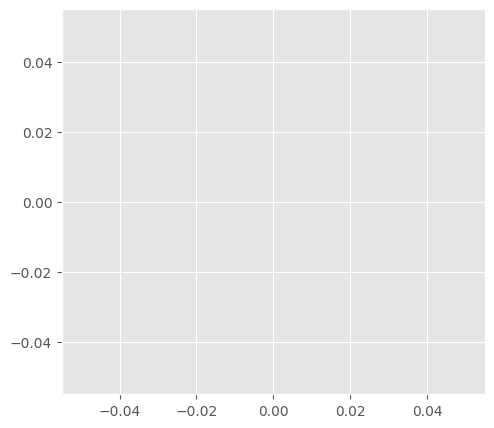

In [ ]:
transformationPlot(np.log(df['amount']))

In [ ]:
df["amount"]=np.log(df["amount"])

In [ ]:
# Object Data Labelencoding

from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df["type"]=la.fit_transform(df["type"])
df["type"].value_counts()

In [ ]:
# Dividing the dataset into dependent and independent y and x respectively
x=df.drop("isFraud",axis=1)
y=df["isFraud"]

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict1)

In [ ]:
print(classification_report(y_test,y_test_predict1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict2)

In [ ]:
print(classification_report(y_test,y_test_predict2))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict3)

In [ ]:
print(classification_report(y_test,y_test_predict3))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)

y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict4)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

la= LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [ ]:
y_test1=la.transform(y_test)

In [ ]:
y_test1=la.transform(y_test)
y_test1

In [ ]:
y_train1

In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy

In [ ]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

In [ ]:
pd.crosstab(y_test1,y_test_predict5)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

In [ ]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc", accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc", accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc", accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc", accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc", accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svc", accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5,y_test1))

In [ ]:
compareModel()

In [ ]:
import pickle
pickle.dump(svc,open("payments.pkl","wb"))